In [9]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1)
data = np.random.normal(size=100)

(a)

/var/folders/2h/48s77_8j28s5ytdwtmlhh4ww0000gn/T/ipykernel_21968/2710729771.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=False, rug=True, color="r", ax=axis)


<Axes: ylabel='Density'>

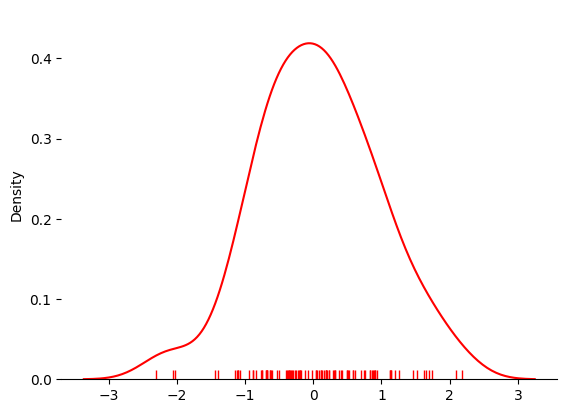

In [10]:
figure, axis = plt.subplots()
sns.despine(left=True)
sns.distplot(data, hist=False, rug=True, color="r", ax=axis)

(b)

/var/folders/2h/48s77_8j28s5ytdwtmlhh4ww0000gn/T/ipykernel_21968/3882549006.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(noise, hist=False, rug=True, color="r", ax=axis)


<Axes: ylabel='Density'>

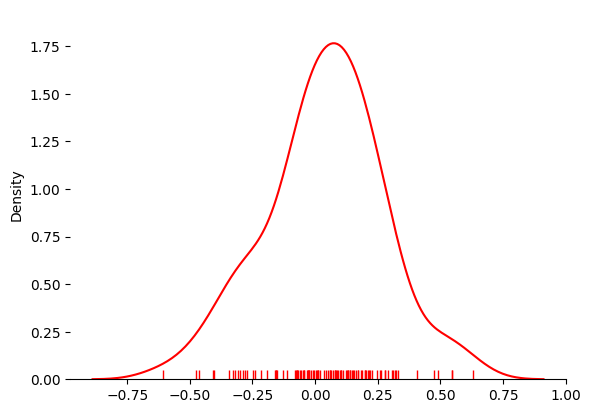

In [11]:
noise = np.random.normal(scale=0.25, size=100)

figure, axis = plt.subplots()
sns.despine(left=True)
sns.distplot(noise, hist=False, rug=True, color="r", ax=axis)

(c)

In [14]:
outcome = -1 + 0.5*data + noise
print('Length of outcome = ' + str(len(outcome)))

Length of outcome = 100


(d)

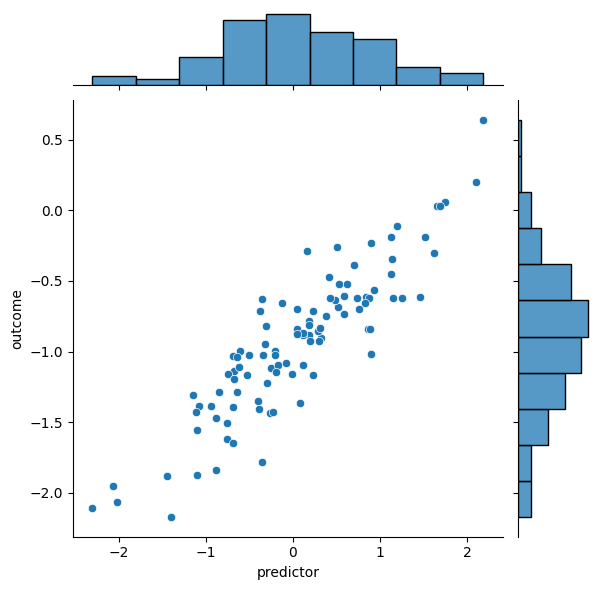

In [15]:
dataframe = pd.DataFrame({'predictor': data, 'outcome': outcome})
sns.jointplot(x='predictor', y='outcome', data=dataframe)

The relationship appears to be linear as anticipated, with variability approximately around 0.5. There are no concerning signs of influential observations or data points that deviate significantly from the pattern.

In [17]:
regression = smf.ols('outcome ~ predictor', dataframe).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                outcome   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           5.39e-36
Time:                        19:08:25   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9632      0.023    -40.999      0.000      -1.010      -0.917
predictor      0.5239      0.026     19.783      0.000       0.471       0.576
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


The regression-derived parameters closely approximate the actual values, though they aren't identical (as would be expected). In both instances, these estimates fall within the boundaries of the 95% confidence interval.

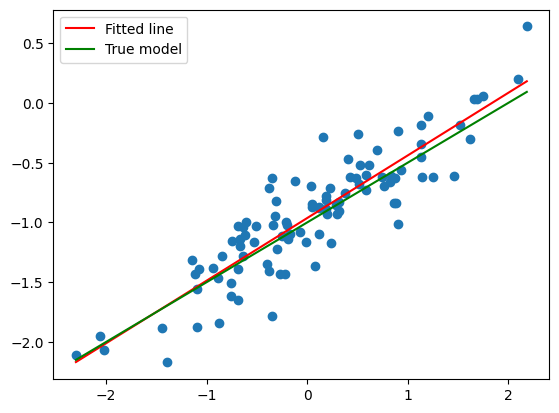

In [18]:
lm_model = LinearRegression(fit_intercept=True)
lm_model.fit(data[:, np.newaxis], outcome)

plt.scatter(dataframe.predictor, dataframe.outcome)

x_values = np.linspace(dataframe.predictor.min(), dataframe.predictor.max(), 100)
y_predicted = lm_model.predict(x_values[:, np.newaxis])
fitted_line, = plt.plot(x_values, y_predicted, color='r')

x_population = np.linspace(dataframe.predictor.min(), dataframe.predictor.max(), 100)
y_population = -1 + 0.5*x_population
population_line, = plt.plot(x_population, y_population, color='g')
plt.legend([fitted_line, population_line], ['Fitted line', 'True model'])

In [19]:
regression_quadratic = smf.ols('outcome ~ predictor + I(predictor**2)', dataframe).fit()
regression_quadratic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                outcome   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           1.32e-34
Time:                        19:09:45   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.9663      0.029    -33.486      0.000      -1.024      -0.909
predictor             0.5234      0.027     19.582      0.000       0.470       0.576
I(predictor ** 2)     0.0039      0.021      0.181      0.856      -0.038       0.046
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Upon examining a model incorporating both X and X² terms, the statistical analysis reveals a p-value of 0.856 for the quadratic component. This high p-value provides insufficient grounds to reject the null hypothesis that the X² coefficient equals zero. In essence, no statistically meaningful connection exists between X² and Y, indicating that including the quadratic element fails to enhance the model's explanatory power. This conclusion is further reinforced when examining the coefficient of the squared term (0.0039), which is very close to zero and falls within its 95% confidence interval (-0.038 to 0.046). The model demonstrates a strong overall fit with an R-squared value of 0.800, but adding the quadratic term does not improve this metric compared to a simpler linear model, confirming the superfluous nature of the quadratic term.

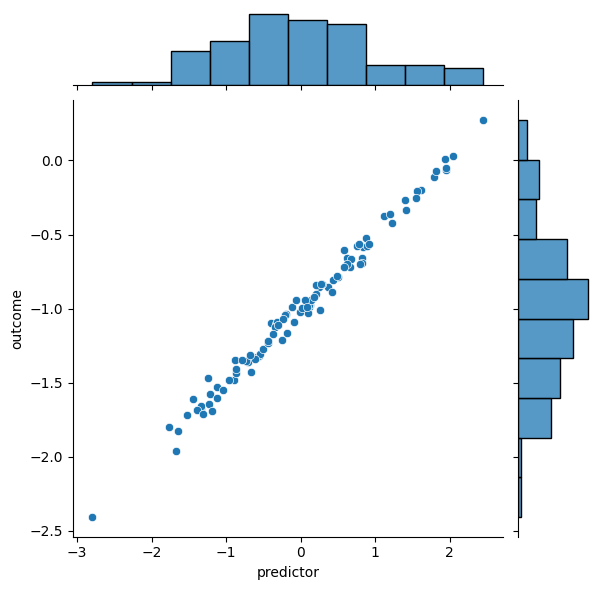

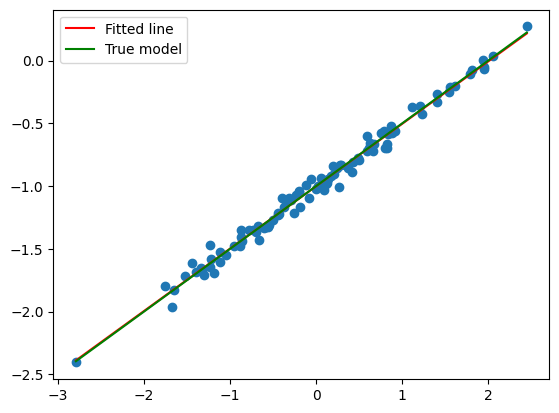

In [20]:
data = np.random.normal(size=100)
noise = np.random.normal(scale=0.05, size=100)
outcome = -1 + 0.5*data + noise

dataframe = pd.DataFrame({'predictor': data, 'outcome': outcome})
sns.jointplot(x='predictor', y='outcome', data=dataframe)

lm_model = LinearRegression(fit_intercept=True)
lm_model.fit(data[:, np.newaxis], outcome)

plt.subplots()
plt.scatter(dataframe.predictor, dataframe.outcome)

x_values = np.linspace(dataframe.predictor.min(), dataframe.predictor.max(), 100)
y_predicted = lm_model.predict(x_values[:, np.newaxis])
fitted_line, = plt.plot(x_values, y_predicted, color='r')

x_population = np.linspace(dataframe.predictor.min(), dataframe.predictor.max(), 100)
y_population = -1 + 0.5*x_population
population_line, = plt.plot(x_population, y_population, color='g')
plt.legend([fitted_line, population_line], ['Fitted line', 'True model'])

In [21]:
regression = smf.ols('outcome ~ predictor', dataframe).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                outcome   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     8662.
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           1.97e-97
Time:                        19:10:28   Log-Likelihood:                 151.58
No. Observations:                 100   AIC:                            -299.2
Df Residuals:                      98   BIC:                            -293.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0010      0.005   -186.443      0.000      -1.012      -0.990
predictor      0.4972      0.005     93.071      0.000       0.487       0.508
==============================================================================
Omnibus:                        0.426   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.808   Jarque-Bera (JB):                0.121
Skew:                          -0.045   Prob(JB):                        0.941
Kurtosis:                       3.145   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The analysis yields predictably superior results, with enhanced model precision, narrower confidence boundaries, and an elevated coefficient of determination.

This statistical framework demonstrates markedly improved performance when applied to this dataset compared to our previous application on information derived from a more chaotic probability distribution.

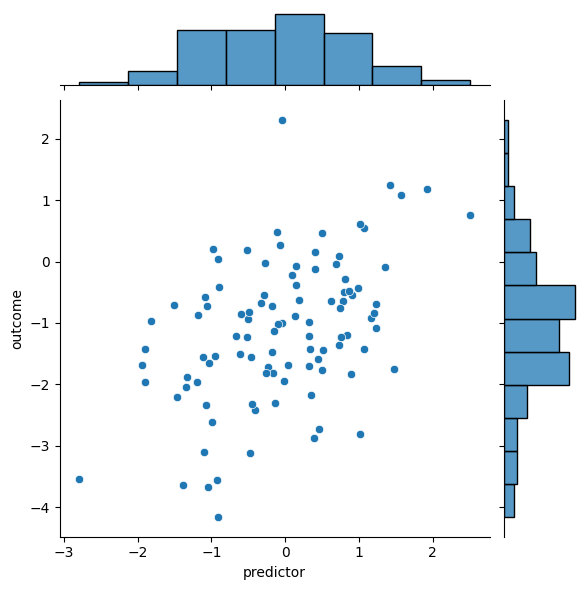

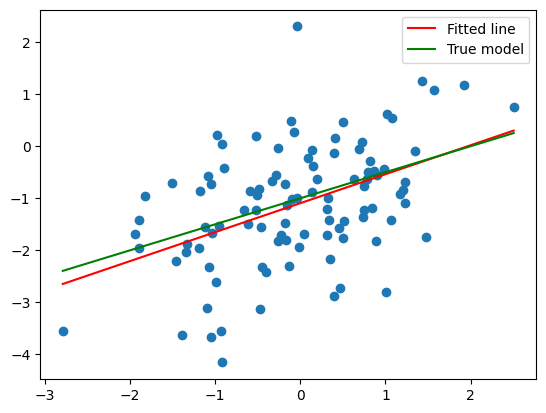

In [24]:

data = np.random.normal(size=100)
noise = np.random.normal(scale=1, size=100)
outcome = -1 + 0.5*data + noise

dataframe = pd.DataFrame({'predictor': data, 'outcome': outcome})
sns.jointplot(x='predictor', y='outcome', data=dataframe)

lm_model = LinearRegression(fit_intercept=True)
lm_model.fit(data[:, np.newaxis], outcome)

plt.subplots()
plt.scatter(dataframe.predictor, dataframe.outcome)

x_values = np.linspace(dataframe.predictor.min(), dataframe.predictor.max(), 100)
y_predicted = lm_model.predict(x_values[:, np.newaxis])
fitted_line, = plt.plot(x_values, y_predicted, color='r')

x_population = np.linspace(dataframe.predictor.min(), dataframe.predictor.max(), 100)
y_population = -1 + 0.5*x_population
population_line, = plt.plot(x_population, y_population, color='g')
plt.legend([fitted_line, population_line], ['Fitted line', 'True model'])

In [23]:
regression = smf.ols('outcome ~ predictor', dataframe).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                outcome   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     33.96
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           7.19e-08
Time:                        19:11:06   Log-Likelihood:                -145.66
No. Observations:                 100   AIC:                             295.3
Df Residuals:                      98   BIC:                             300.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8802      0.105     -8.375      0.000      -1.089      -0.672
predictor      0.5903      0.101      5.828      0.000       0.389       0.791
==============================================================================
Omnibus:                        3.633   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.163   Jarque-Bera (JB):                3.566
Skew:                           0.192   Prob(JB):                        0.168
Kurtosis:                       3.842   Cond. No.                         1.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Confidence Intervals Comparison

## Less Noisy Dataset
- β₀ (Intercept): [-1.024, -0.909], width ≈ 0.115
- β₁ (Predictor): [0.470, 0.576], width ≈ 0.106
- R² = 0.800

## Noisier Dataset
- β₀ (Intercept): [-1.089, -0.672], width ≈ 0.417
- β₁ (Predictor): [0.389, 0.791], width ≈ 0.402
- R² = 0.257

## Analysis
As noise levels increase, confidence interval widths expand significantly while R² decreases substantially. Point estimates remain relatively stable despite increasing uncertainty in parameter estimation.